In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

yf.pdr_override()

y_symbols = ['^GSPC', '^MXX', '^FCHI','^NYA','^JKSE', '^RUT','^KS11' ]

start_date = dt.datetime(2000,1,1)
end_date = dt.datetime(2020,1,2)


In [3]:
def convert_to_USD(index_data, currency):
    # get historical conversion rate to USD
    tckr = yf.Ticker(currency+"USD=X")
    df = tckr.history(start=start_date, end=end_date)
    # fixing stupid error in the data
    if currency=="IDR":
        df.loc["2010-11-01"]=df.loc["2010-11-02"]
    currency_data = df.resample('BMS').first()
    
    # convert the data
    for item in index_data.items():
        closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
        #print(item[0])
        #print("closest date: " + str(closest_date))
        #print("before: " + str(item[1]))
        exchange_rate = currency_data.loc[closest_date]["Open"]
        #print("exchange_rate: " + str(exchange_rate))
        index_data[item[0]] = item[1]*exchange_rate
        #print("after: " + str(index_data[item[0]]))
        #print("________________________________")
    
    return index_data

In [4]:
data = pdr.get_data_yahoo(y_symbols, start=start_date, end=end_date, interval='1mo')['Adj Close']

data["^FCHI"] = convert_to_USD(data["^FCHI"], "EUR")
data["^MXX"] = convert_to_USD(data["^MXX"], "MXN")
data["^JKSE"] = convert_to_USD(data["^JKSE"], "IDR")
data["^KS11"] = convert_to_USD(data["^KS11"], "KRW")


[*********************100%***********************]  7 of 7 completed


/tmp/ipykernel_8561/3324130515.py:12: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
/tmp/ipykernel_8561/3324130515.py:12: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
/tmp/ipykernel_8561/3324130515.py:12: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
/tmp/ipykernel_8561/3324130515.py:12: FutureWarning: Passing method to DatetimeIndex.ge

In [5]:
# 10 years sliding window
sliding_windows_data = {}

for j in range(11):
    i=12*j
    returns = (data / data.shift(1))[1+i:12*10+i]
    print(returns)
    logReturn = np.log(returns)
    #var(aX) = a^2var(X), cov(aX, aX) = a^2 cov(X,X)
    yearly_mean = 12 * logReturn.mean()
    yearly_var = 12 * logReturn.var()
    yearly_std = np.sqrt(yearly_var)
    yearly_cov = 12 * logReturn.cov()

    dates = (data.index[i], data.index[12*10+i])

    sliding_windows_data[str(j+1) +'_yearly_mean'] = yearly_mean
    sliding_windows_data[str(j+1) +'_yearly_var'] = yearly_var
    sliding_windows_data[str(j+1) +'_yearly_std'] = yearly_std
    sliding_windows_data[str(j+1) +'_yearly_cov'] = yearly_cov
    sliding_windows_data[str(j+1) +'_dates'] = dates
    
    

               ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA  \
Date                                                                     
2000-02-01  1.093846  0.979892  0.905983  0.877633  1.118876  0.953211   
2000-03-01  1.015359  1.096720  1.011680  1.039306  1.014209  1.092906   
2000-04-01  1.021265  0.969204  0.903066  0.842556  0.888593  0.994533   
2000-05-01  1.001019  0.978085  0.862531  1.008947  0.897670  0.999131   
2000-06-01  1.003156  1.023934  1.133787  1.122069  1.165604  0.998960   
...              ...       ...       ...       ...       ...       ...   
2009-08-01  1.095112  1.033560  1.061341  1.072156  1.038173  1.034083   
2009-09-01  1.024590  1.035723  1.006982  1.022577  1.027590  1.040288   
2009-10-01  0.972133  0.980238  0.999108  1.017091  0.968300  0.975194   
2009-11-01  1.031911  1.057364  1.030396  0.979056  1.102110  1.052365   
2009-12-01  1.093058  1.017771  1.078721  1.085105  1.063858  1.013056   

                ^RUT  
Date          

In [6]:
sliding_windows_data

{'1_yearly_mean': ^FCHI   -0.014171
 ^GSPC   -0.022544
 ^JKSE    0.131009
 ^KS11    0.061436
 ^MXX     0.145157
 ^NYA     0.008961
 ^RUT     0.023328
 dtype: float64,
 '1_yearly_var': ^FCHI    0.049806
 ^GSPC    0.026898
 ^JKSE    0.095920
 ^KS11    0.096574
 ^MXX     0.060982
 ^NYA     0.027178
 ^RUT     0.048064
 dtype: float64,
 '1_yearly_std': ^FCHI    0.223172
 ^GSPC    0.164005
 ^JKSE    0.309710
 ^KS11    0.310763
 ^MXX     0.246946
 ^NYA     0.164857
 ^RUT     0.219235
 dtype: float64,
 '1_yearly_cov':           ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA      ^RUT
 ^FCHI  0.049806  0.030266  0.026973  0.043901  0.037011  0.029514  0.037037
 ^GSPC  0.030266  0.026898  0.020098  0.032241  0.030335  0.026041  0.029215
 ^JKSE  0.026973  0.020098  0.095920  0.057075  0.043570  0.023511  0.029088
 ^KS11  0.043901  0.032241  0.057075  0.096574  0.048179  0.031714  0.038048
 ^MXX   0.037011  0.030335  0.043570  0.048179  0.060982  0.029814  0.043266
 ^NYA   0.029514  0.026

In [7]:
#expected yearly returns:
for j in range(11):
    print("SLIDING WINDOW ", j+1)
    print(sliding_windows_data[str(j+1) +'_yearly_mean'])
    print("____________________________________________________________")

SLIDING WINDOW  1
^FCHI   -0.014171
^GSPC   -0.022544
^JKSE    0.131009
^KS11    0.061436
^MXX     0.145157
^NYA     0.008961
^RUT     0.023328
dtype: float64
____________________________________________________________
SLIDING WINDOW  2
^FCHI   -0.038160
^GSPC   -0.008335
^JKSE    0.218437
^KS11    0.124104
^MXX     0.168452
^NYA     0.012764
^RUT     0.043645
dtype: float64
____________________________________________________________
SLIDING WINDOW  3
^FCHI   -0.023635
^GSPC    0.010771
^JKSE    0.205159
^KS11    0.094875
^MXX     0.149197
^NYA     0.020247
^RUT     0.043126
dtype: float64
____________________________________________________________
SLIDING WINDOW  4
^FCHI    0.029403
^GSPC    0.051513
^JKSE    0.211405
^KS11    0.135330
^MXX     0.186215
^NYA     0.055520
^RUT     0.083205
dtype: float64
____________________________________________________________
SLIDING WINDOW  5
^FCHI    0.024433
^GSPC    0.049521
^JKSE    0.142523
^KS11    0.099046
^MXX     0.136537
^NYA     0.0

In [8]:
#cov_matrices:
for j in range(11):
    print("SLIDING WINDOW ", j+1)
    print(sliding_windows_data[str(j+1) +'_yearly_cov'])
    print("____________________________________________________________")

SLIDING WINDOW  1
          ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA      ^RUT
^FCHI  0.049806  0.030266  0.026973  0.043901  0.037011  0.029514  0.037037
^GSPC  0.030266  0.026898  0.020098  0.032241  0.030335  0.026041  0.029215
^JKSE  0.026973  0.020098  0.095920  0.057075  0.043570  0.023511  0.029088
^KS11  0.043901  0.032241  0.057075  0.096574  0.048179  0.031714  0.038048
^MXX   0.037011  0.030335  0.043570  0.048179  0.060982  0.029814  0.043266
^NYA   0.029514  0.026041  0.023511  0.031714  0.029814  0.027178  0.028480
^RUT   0.037037  0.029215  0.029088  0.038048  0.043266  0.028480  0.048064
____________________________________________________________
SLIDING WINDOW  2
          ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA      ^RUT
^FCHI  0.053186  0.032035  0.030609  0.047606  0.038069  0.032161  0.037629
^GSPC  0.032035  0.027883  0.021728  0.031207  0.029539  0.027829  0.032200
^JKSE  0.030609  0.021728  0.089497  0.049644  0.039543  0.026348  

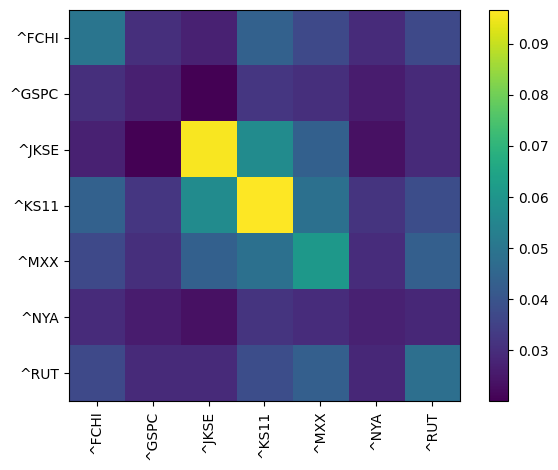

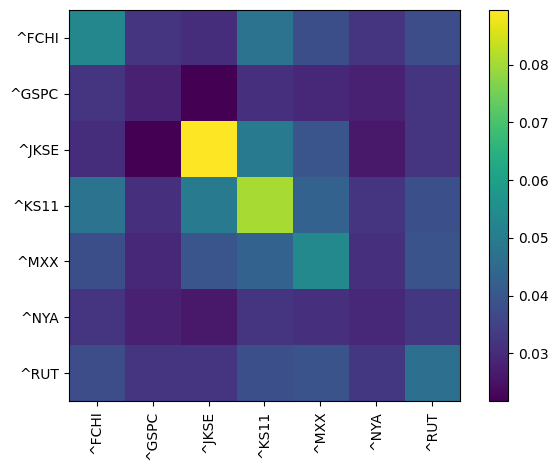

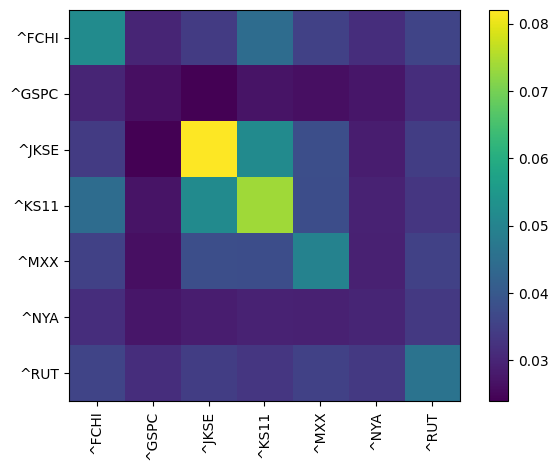

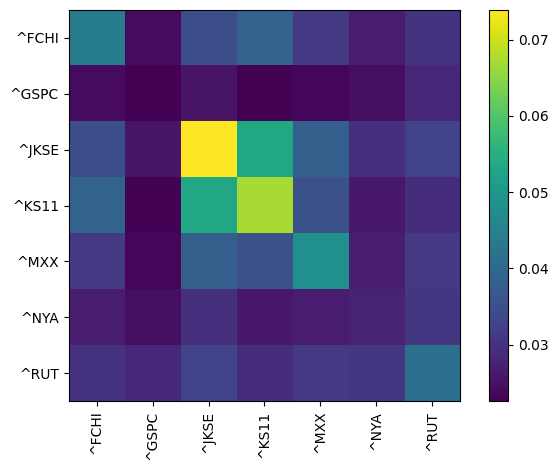

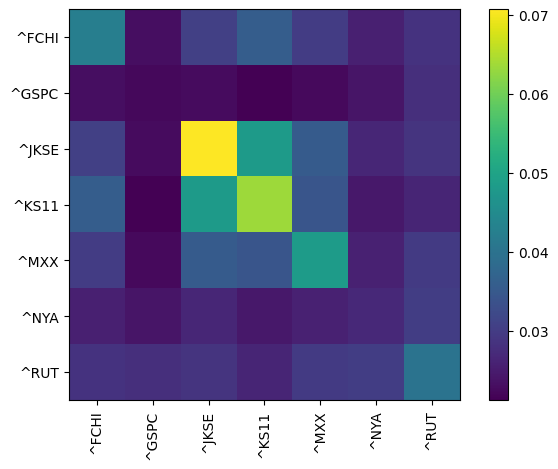

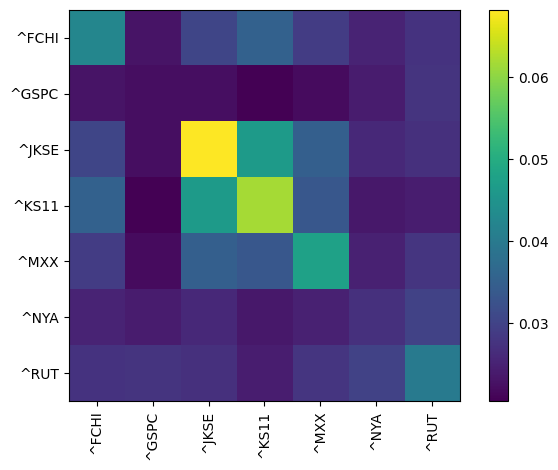

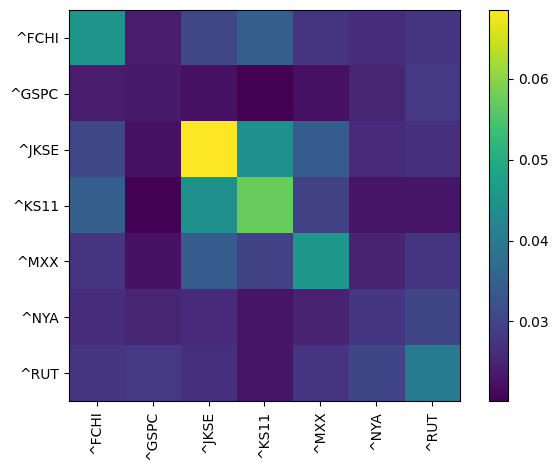

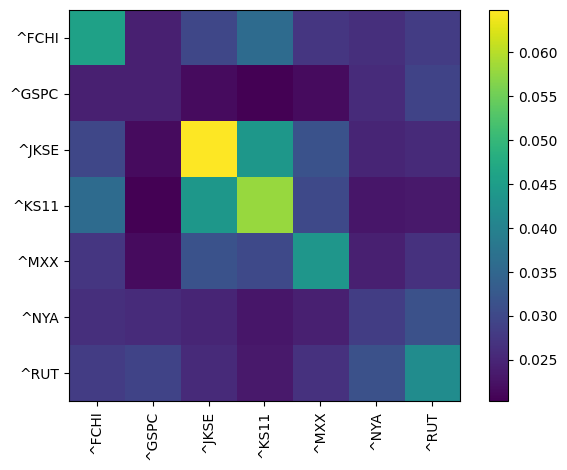

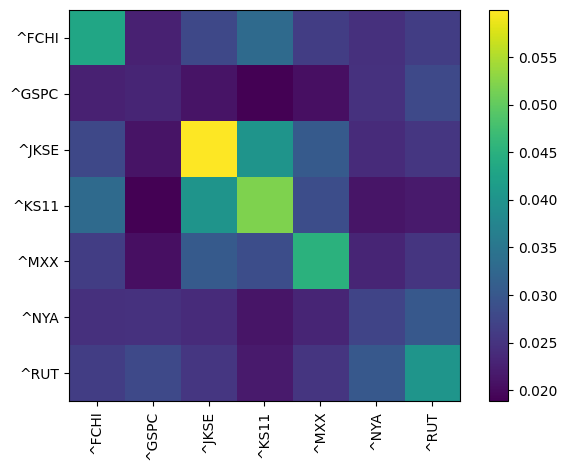

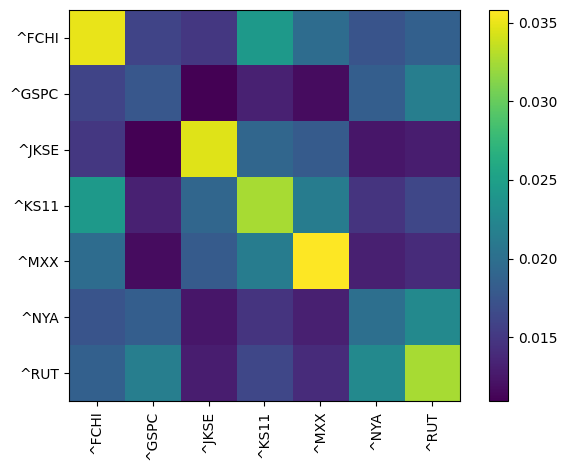

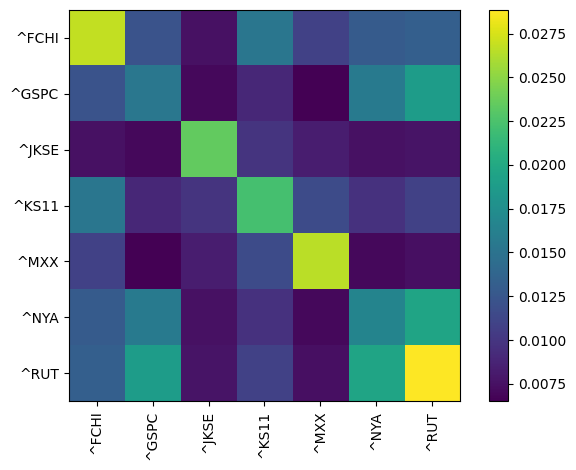

In [9]:
from pypfopt.plotting import plot_covariance
#cov_matrices:
for j in range(11):
    plot_covariance(sliding_windows_data[str(j+1) +'_yearly_cov'])

#### Efficient frontiers

/tmp/ipykernel_8561/1617126543.py:24: RuntimeWarning: invalid value encountered in true_divide
  weights /= np.sum(weights)


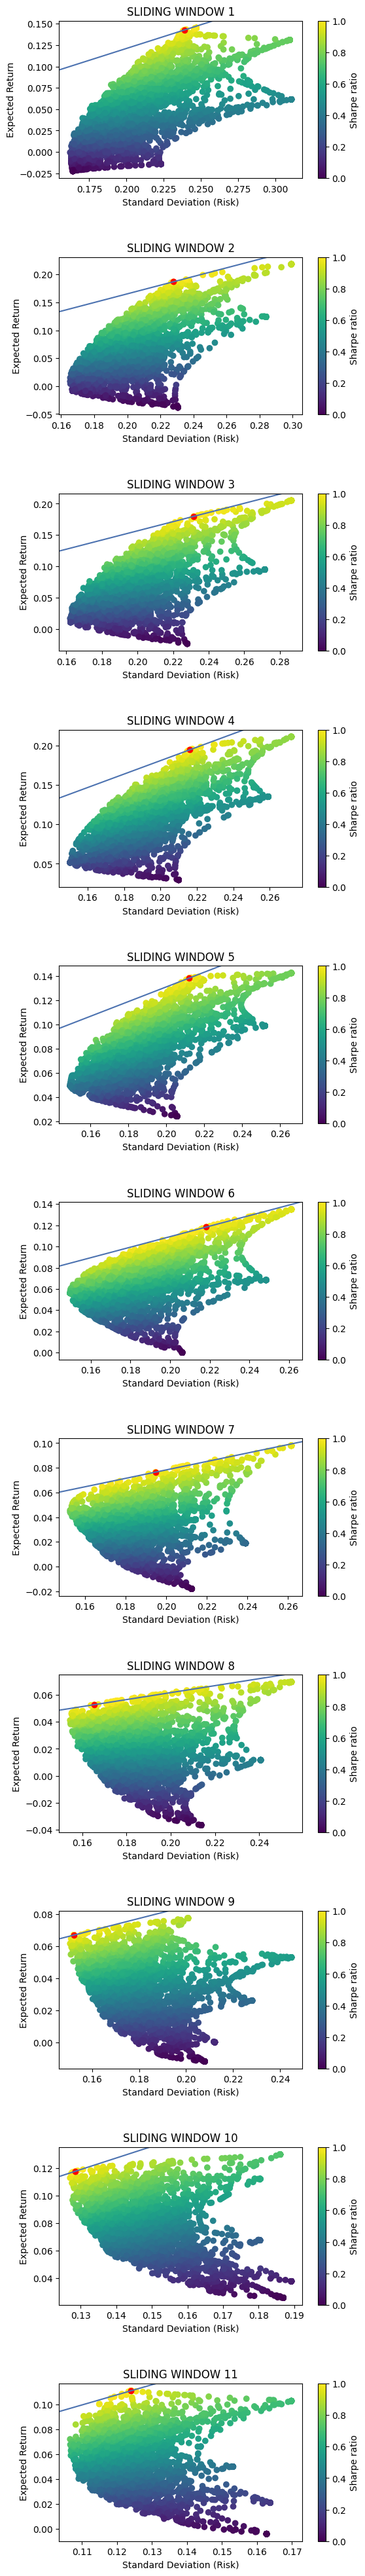

In [10]:
import numpy as np
import matplotlib.pyplot as plt

risk_free_rate = 0.01

 #take a list of lists of frontier returns and variances
f_r = []
f_v = []
sharper = []
w = [] #append weights for each portfolio
frontiers_portfolios = []
highest_sharper_portfolios = []

for j in range(11):
    returns = sliding_windows_data[str(j+1) +'_yearly_mean']
    covariances = sliding_windows_data[str(j+1) +'_yearly_cov']

    frontier_mean_returns = []
    frontier_stds = []

    for i in range(3000):
        weights = np.random.normal(0, 1, size=7) #use normal distribution
        weights = [x if x >= 0 else 0 for x in weights]  
        weights /= np.sum(weights)
        if np.isnan(weights).any():
            continue
        portfolio_return = np.sum(returns * weights)
        portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariances, weights)))
        frontier_mean_returns.append(portfolio_return)
        frontier_stds.append(portfolio_std)
        w.append(weights)
    frontiers_portfolios.append(w)
    f_r.append(frontier_mean_returns)
    f_v.append(frontier_stds)

    # highest sharper portfolio
    sharper.append(np.array(frontier_mean_returns) / np.array(frontier_stds))
    index = sharper[-1].argmax(axis=0)
    highest_sharper_portfolios.append({
        "dates": sliding_windows_data[str(j+1) +'_dates'],
        "return": frontier_mean_returns[index],
        "std": frontier_stds[index],
        "weights": frontiers_portfolios[j][index]})

    

    
# Create a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    im = axs[i].scatter(f_v[i], f_r[i], c=sharper[i])
    im = axs[i].scatter(highest_sharper_portfolios[i]["std"], highest_sharper_portfolios[i]["return"], c="red")
    # plotting capital market line (tobin separation)
    # equivalent to 
    #axs[i].axline((0, risk_free_rate), (highest_sharper_portfolios[i]["std"], highest_sharper_portfolios[i]["return"]))
    # but prettier
    axs[i].axline(
        (min(f_v[i]), (min(f_v[i])/highest_sharper_portfolios[i]["std"])*(highest_sharper_portfolios[i]["return"]-risk_free_rate)+risk_free_rate),
        (highest_sharper_portfolios[i]["std"], highest_sharper_portfolios[i]["return"]))
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    plt.colorbar(im, ax=axs[i], label = 'Sharpe ratio')
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()



In [11]:
# Asset Allocation
# I'm calculating optimal asset allocation and turnover for each time window. Maybe we're supposed to do it for each year idk 
# (should anual rebalancing happen based on the last year or based on the last 10 year window?)

# required rate of return
rrr = 0.05

# optimal asset allocation:
# mix of max sharpe ratio portfolio and risk free rate that reaches RRR

for i, portfolio in enumerate(highest_sharper_portfolios):

    risk_free_rate_portion = (rrr - portfolio["return"]) / (risk_free_rate - portfolio["return"])
    highest_sharper_portfolios[i]["risk_free_rate_portion"] = risk_free_rate_portion
    highest_sharper_portfolios[i]["weights_incl_rf"] = np.append(portfolio["weights"]*(1-risk_free_rate_portion), risk_free_rate_portion)

    print(f"""{round(risk_free_rate_portion*100)}% of the portfolio in window {str(i+1)} should be risk free at {risk_free_rate*100}%, the remaining {round((1-risk_free_rate_portion)*100)}% have a return of {round(portfolio["return"]*100)}%""")


70% of the portfolio in window 1 should be risk free at 1.0%, the remaining 30% have a return of 14%
77% of the portfolio in window 2 should be risk free at 1.0%, the remaining 23% have a return of 19%
76% of the portfolio in window 3 should be risk free at 1.0%, the remaining 24% have a return of 18%
78% of the portfolio in window 4 should be risk free at 1.0%, the remaining 22% have a return of 19%
69% of the portfolio in window 5 should be risk free at 1.0%, the remaining 31% have a return of 14%
63% of the portfolio in window 6 should be risk free at 1.0%, the remaining 37% have a return of 12%
40% of the portfolio in window 7 should be risk free at 1.0%, the remaining 60% have a return of 8%
6% of the portfolio in window 8 should be risk free at 1.0%, the remaining 94% have a return of 5%
30% of the portfolio in window 9 should be risk free at 1.0%, the remaining 70% have a return of 7%
63% of the portfolio in window 10 should be risk free at 1.0%, the remaining 37% have a return 

In [12]:
# turnover
# For turnover I'm considering all assets, not just risk free. Not sure if it's correct.
for i, (portfolio, previous_portfolio) in enumerate(zip(highest_sharper_portfolios[1:], highest_sharper_portfolios)):
    
    unchanged_assets = [min(weight_pair) for weight_pair in zip(portfolio["weights_incl_rf"], previous_portfolio["weights_incl_rf"])]
    turnover_rate = 1-sum(unchanged_assets)
    print(f"turnover rate from sliding window {i+1} to sliding window {i+2} is {round(turnover_rate*100)}%")


turnover rate from sliding window 1 to sliding window 2 is 8%
turnover rate from sliding window 2 to sliding window 3 is 24%
turnover rate from sliding window 3 to sliding window 4 is 22%
turnover rate from sliding window 4 to sliding window 5 is 18%
turnover rate from sliding window 5 to sliding window 6 is 32%
turnover rate from sliding window 6 to sliding window 7 is 60%
turnover rate from sliding window 7 to sliding window 8 is 73%
turnover rate from sliding window 8 to sliding window 9 is 44%
turnover rate from sliding window 9 to sliding window 10 is 63%
turnover rate from sliding window 10 to sliding window 11 is 31%


In [13]:
data

,^FCHI,^GSPC,^JKSE,^KS11,^MXX,^NYA,^RUT
Date,,,,,,,
2000-01-01,6811.006068,1394.459961,0.055622,0.788340,589.184603,6574.009766,496.230011
2000-02-01,7450.190983,1366.420044,0.050393,0.691873,659.224671,6266.419922,577.710022
2000-03-01,7564.621943,1498.579956,0.050981,0.719068,668.591637,6848.609863,539.090027
2000-04-01,7725.480694,1452.430054,0.046039,0.605855,594.106075,6811.169922,506.250000
2000-05-01,7733.350379,1420.599976,0.039710,0.611275,533.311269,6805.250000,476.179993
...,...,...,...,...,...,...,...
2019-09-01,6240.427184,2976.739990,0.435118,1.705747,2140.460400,13004.740234,1523.369995
2019-10-01,6245.078868,3037.560059,0.437938,1.740221,2196.205403,13171.809570,1562.449951
2019-11-01,6587.870861,3140.979980,0.425586,1.787178,2226.101606,13545.209961,1624.500000


In [57]:
# Backtest (probably not correct yet)
for i, portfolio in enumerate(highest_sharper_portfolios[:-1]):
    symbol_weight_pairs = [pair for pair in zip(data.columns, portfolio['weights_incl_rf']) if pair[1]] + [("risk free asset", portfolio['weights_incl_rf'][-1])]
    print(f"Year: {portfolio['dates'][1].year}")
    print(f"Weights: {', '.join([str(round(weight*100))+'% '+symbol for symbol, weight in symbol_weight_pairs])}")
    

    returns = (data / data.shift(1))[i*12+120:i*12+120+12]#*portfolio["weights"]
    logReturn = np.log(returns)
    logReturn["rf"] = [risk_free_rate]*12
    #var(aX) = a^2var(X), cov(aX, aX) = a^2 cov(X,X)
    weighted_return = np.sum(logReturn*portfolio["weights_incl_rf"]).mean()
    print(f"Return: " + str(round(weighted_return,4)))

    weighted_var = ((logReturn.var()*portfolio["weights_incl_rf"])*len(logReturn.columns)).mean()
    weighted_std = np.sqrt(weighted_var)

    #print(f"Return: {str(round((total_weighted_return-1)*100))}%")
    print(f"Standard deviation: " + str(round(weighted_std,4)))

Year: 2010
Weights: 5% ^JKSE, 25% ^MXX, 70% risk free asset
Return: 0.0199
Standard deviation: 0.0295
Year: 2011
Weights: 23% ^MXX, 77% risk free asset
Return: 0.008
Standard deviation: 0.0205
Year: 2012
Weights: 20% ^JKSE, 3% ^NYA, 0% ^RUT, 76% risk free asset
Return: 0.0136
Standard deviation: 0.0175
Year: 2013
Weights: 2% ^FCHI, 10% ^GSPC, 1% ^JKSE, 3% ^KS11, 3% ^MXX, 3% ^RUT, 78% risk free asset
Return: 0.0164
Standard deviation: 0.0147
Year: 2014
Weights: 1% ^FCHI, 22% ^GSPC, 8% ^KS11, 69% risk free asset
Return: 0.0125
Standard deviation: 0.0156
Year: 2015
Weights: 5% ^GSPC, 32% ^NYA, 63% risk free asset
Return: 0.0068
Standard deviation: 0.0224
Year: 2016
Weights: 7% ^FCHI, 21% ^JKSE, 30% ^MXX, 2% ^RUT, 40% risk free asset
Return: 0.0052
Standard deviation: 0.0298
Year: 2017
Weights: 3% ^GSPC, 33% ^JKSE, 48% ^KS11, 10% ^NYA, 6% risk free asset
Return: 0.0275
Standard deviation: 0.0201
Year: 2018
Weights: 42% ^JKSE, 7% ^KS11, 22% ^NYA, 30% risk free asset
Return: -0.0048
Standard

In [ ]:
#The results might change between runs because the points are computed at random

In [ ]:
for i in range(len(f_r)):
    print("Highest return portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmax(f_r[i])])
    print("__________________________________________")

In [ ]:
# Less risky portfolio
for i in range(len(f_r)):
    print("Lowest risk portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmin(f_v[i])])
    print("__________________________________________")

In [ ]:
#Highest sharpe ratio

for i in range(11):
    SharpeR = np.array(f_r[i]) / np.array(f_v[i])
    print("Highest Sharpe-ratio portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmax(SharpeR)])
    print("__________________________________________")

# Let's try to replicate the previous efficient frontiers with a library

In [ ]:
!pip install PyPortfolioOpt

In [ ]:
from pypfopt import EfficientFrontier
from pypfopt import plotting

# Create a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    ef = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    plotting.plot_efficient_frontier(ef, ax=axs[i], show_assets=True)
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()

### The results are the same, we can use the library to use compute the efficient frontier with risk free rate 1

## Efficient frontier risk free rate

In [ ]:
Rf = 0.01


fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    ef = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    plotting.plot_efficient_frontier(ef, ax=axs[i], show_assets=True)
    #need to create another instance
    ef2 = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    Best_portfolio = ef2.max_sharpe(risk_free_rate=0) #best portfolio weights
    stats = ef2.portfolio_performance(verbose=False, risk_free_rate=0)
    Rp = stats[0]
    sigma = stats[1]
    
    xs = np.linspace(0, 2)
    sigma_c = xs * sigma # slide 22 ch05
    Rc = Rf + (Rp - Rf)/sigma * sigma_c
    
    
    opt = axs[i].scatter(sigma, Rp, marker = '*', c = 'red', s=100, label = 'optimal portfolio')#best performance portfolio
    line1, = axs[i].plot(sigma_c, Rc, "-", color="k", linewidth=0.8, label = 'lending and borrowing')
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    axs[i].legend()
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()
